# Data Viz with 3D Charts

## $$ f(x,y) = \frac{1}{3^{-x^2-y^2}+1 }$$

Minimise $$f(x,y) = \frac{1}{r + 1} $$ where $r$ is $3^{-x^2-y^2} $


In [14]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm

from sympy import symbols,diff
from math import log

%matplotlib inline

In [2]:
def f(x,y):
    r = 3**(-x**2 -y**2)
    return 1/(r+1)

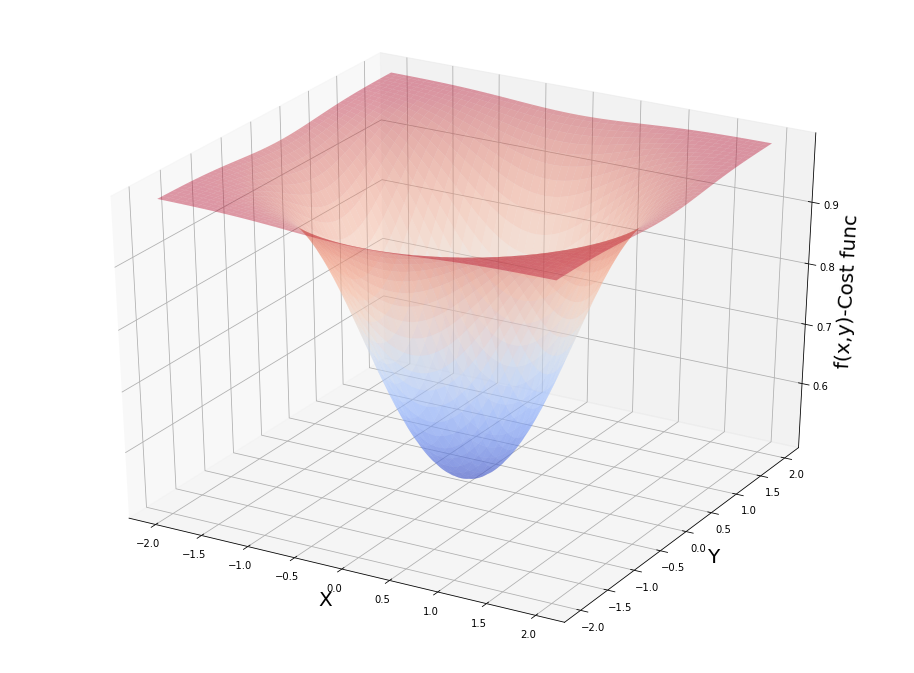

In [3]:
# Make our x and y data

x_4 = np.linspace(-2,2,200)
y_4 = np.linspace(-2,2,200)

x_4,y_4 = np.meshgrid(x_4,y_4)

#Plotting our 3D Graph

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost func',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)

plt.show()



In [4]:

a,b = symbols('x,y')
print("Cost function is :",f(a,b))
print("Partial Derivative wrt x:",diff(f(a,b),a))
print("Partial Derivative wrt y:",diff(f(a,b),b))

print("Value of f(x,y) at x=1.8 & y=1.0 is :",
     f(a,b).evalf(subs={a:1.8,b:1.0}))
print("Value of partial derivative wrt x :",diff(f(a,b),a).evalf(subs={a:1.8,b:1.0}))



Cost function is : 1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Partial Derivative wrt y: 2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 & y=1.0 is : 0.990604794032582
Value of partial derivative wrt x : 0.0368089716197505


#### while taking the partial derivative directly from diff function sometime while plotting that into your graph you can get some error. In that case you can take the derivative from diff function and make your own function. That will be fast as well.

In [22]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

## Batch Gradient Descent using SymPy

### To calculate the partial derivative(slope) of our function we are using the library sympy

In [29]:
multiplier = 0.1
max_iter = 200
params = np.array([1.8,1.0]) #Initial guess 
values_arr = params.reshape(1,2)
print(values_arr.shape)

for n in range(max_iter):
    #grad_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]}) # while taking gradient value in this way you might get error.
    #grad_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    grad_x = fpx(params[0],params[1])
    grad_y = fpy(params[0],params[1])
    gradients = np.array([grad_x,grad_y])
    params = params - multiplier*gradients
    values_arr = np.concatenate((values_arr,params.reshape(1,2)),axis = 0)
    #values_arr = np.append(values_arr,params.reshape(1, 2),axis=0)

#Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


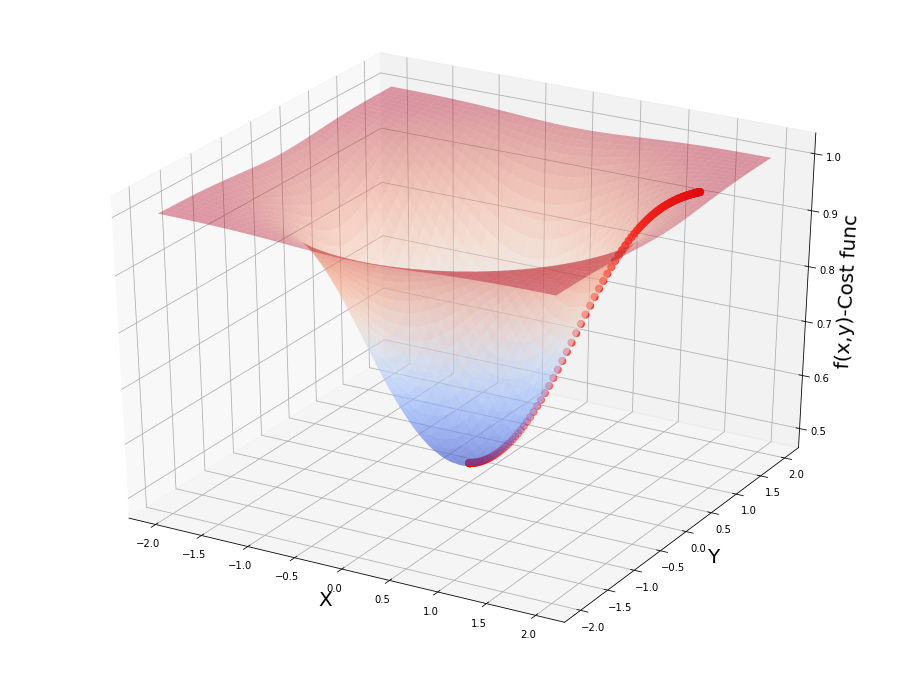

In [30]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y)-Cost func',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4),cmap=cm.coolwarm,alpha=0.4)
ax.scatter(values_arr[:,0],values_arr[:,1],f(values_arr[:,0],values_arr[:,1]),s=50,color='red')

plt.show()